In [1]:
from numpy.linalg import svd, norm
from scipy.optimize import minimize, NonlinearConstraint
from scipy.optimize import differential_evolution


In [2]:
import numpy as np
from scipy.stats import ortho_group, unitary_group
import matplotlib.pyplot as plt
from scipy.linalg import schur, eigvals
from scipy.linalg import block_diag
from numpy import linalg as LA
import math
import time

In [3]:
from numpy import linalg
from scipy.linalg import block_diag
from scipy.spatial.transform import Rotation as R
from module.unitary_dilation import dilation, check_if_can_dilate
from scipy.linalg import sqrtm


In [4]:
from module._rc_operations import cycle
from module.util import check_orthogonal, spec_radius, rot_angles
from module.orthogonal_equiv import ortho_xform
from module.perfect_match_graph import approximateTu

In [5]:
ndim = 20

In [6]:
U = ortho_group.rvs(ndim)

In [7]:
Tu, Ju = schur(U/spec_radius(U), output = 'real')

In [8]:
T_approx = approximateTu(Tu/spec_radius(Tu), epsilon = 0.01, n1_flag = True)

In [9]:
if T_approx[1].shape[0] > 0:
    T_full = block_diag(*[T_approx[0], T_approx[1]])
else:
    T_full = T_approx[0]

dim_cyc = T_full.shape[0]
C = cycle(dim_cyc, spectral_radius = 1)

In [10]:
Tc, Jc = schur(C, output='real')
assert np.allclose(Jc @ Tc @ Jc.T, C)

#A_values, A_vectors = np.linalg.eig(Ta)
#C_values, C_vectors = np.linalg.eig(Tc)

#assert np.allclose(np.sort(A_values), np.sort(C_values))

# Find orthogonal transform:
P_bar = ortho_xform(T_full,Tc)

#         print('P orthogonal?')
assert check_orthogonal(Jc)
assert check_orthogonal(P_bar)
assert np.allclose(P_bar @ T_full @ P_bar.T, Tc)

In [11]:
cyclic_list = rot_angles(C)
ortho_list = rot_angles(U/spec_radius(U), single_angle=True)

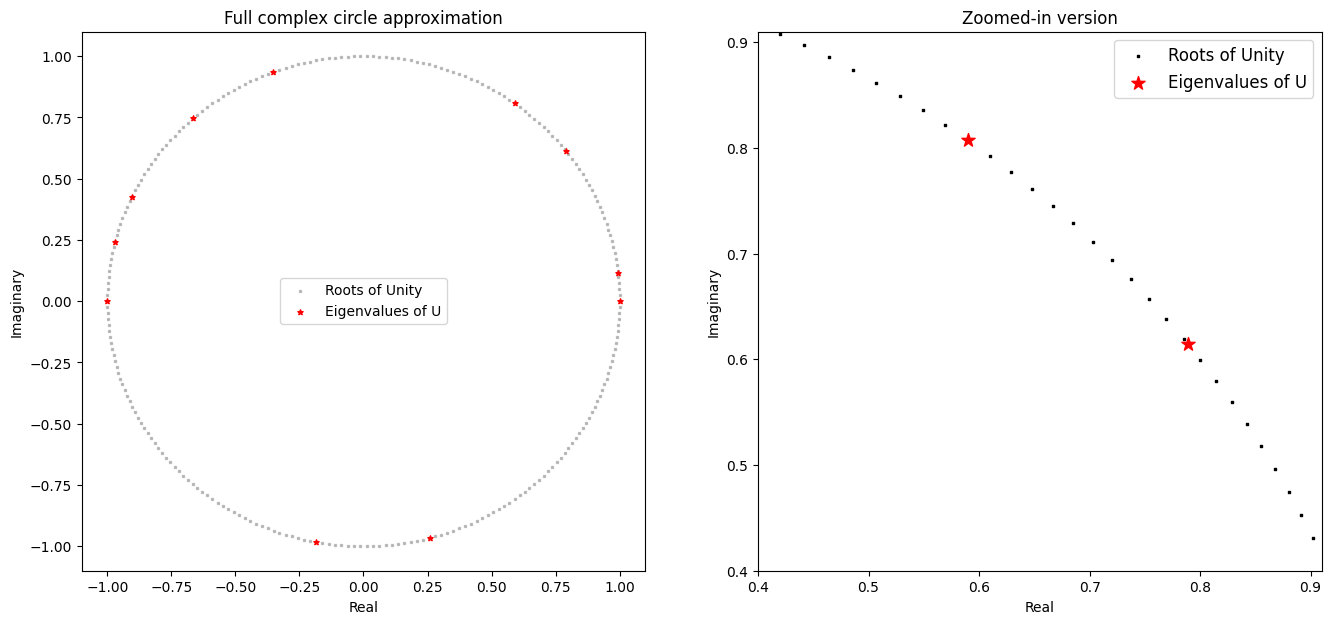

In [12]:
fig, axx = plt.subplots(nrows=1, ncols=2, figsize=(16,7))

# Complex circle
ax = axx[0]
# plt.figsize((10,10))
ac = np.cos(cyclic_list) + np.sin(cyclic_list)*1j
ao = np.cos(ortho_list) + np.sin(ortho_list)*1j

ax.scatter(ac.real,ac.imag, color = 'k', marker = ',', s = 0.6, label = 'Roots of Unity', alpha = 0.2)
ax.scatter(ao.real,ao.imag, color = 'r', marker = '*', s = 15, label = 'Eigenvalues of U')
ax.legend()
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Full complex circle approximation')

# Zoom in to complex circle
ax = axx[1]

rootsW = ax.scatter(ac.real,ac.imag, color = 'k', marker = ',', s = 1)
eigenU = ax.scatter(ao.real,ao.imag, color = 'r', marker = '*', s = 100)

ax.legend((rootsW, eigenU), ('Roots of Unity', 'Eigenvalues of U'), loc= 'best', fontsize=12)

x_min = 0.40
x_max = 0.91
y_min = x_min
y_max = x_max

ax.axis([x_min, x_max, y_min, y_max])
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Zoomed-in version')

fig.savefig('./results/angle_interpol.pdf')


In [13]:
C.shape

(254, 254)

In [14]:
T_approx

(array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.99236079, -0.12336964,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.12336964,  0.99236079,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.78512546, -0.61933675,
          0.        ,  0.        , 

In [15]:
np.pi * 2 * (len(Tu)+1) / np.arccos(1 - (0.01 ** 2) / 2) 

13194.63416681699